<a href="https://colab.research.google.com/github/engineereliab076/my-projects/blob/main/REAL%20FAKE%20NEWS%20CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
news_data = pd.read_csv('/content/Fake_Real_Data.csv', error_bad_lines=False)

<ipython-input-3-7355ea7d93d2>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  news_data = pd.read_csv('/content/Fake_Real_Data.csv', error_bad_lines=False)


In [5]:
print(news_data.head())

                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real


In [6]:
news_data.shape

(9900, 2)

In [7]:
news_data['label'].value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [8]:
news_data.describe()

,Text,label
count,9900,9900
unique,9865,2
top,Highlights: The Trump presidency on April 13 a...,Fake
freq,8,5000


In [12]:
news_data.replace({'label':{'Fake':0,'Real':1}}, inplace=True)

In [13]:
news_data.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


In [15]:
x = news_data['Text']
y = news_data['label']

In [16]:
print(x.head())

0     Top Trump Surrogate BRUTALLY Stabs Him In The...
1    U.S. conservative leader optimistic of common ...
2    Trump proposes U.S. tax overhaul, stirs concer...
3     Court Forces Ohio To Allow Millions Of Illega...
4    Democrats say Trump agrees to work on immigrat...
Name: Text, dtype: object


In [19]:
print(y.head())

0    0
1    1
2    1
3    0
4    1
Name: label, dtype: int64


train test split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(9900,) (7920,) (1980,)


model training

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.neighbors import KNeighborsClassifier

1.KNN USING euclidean

In [32]:
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.46      0.63       973
           1       0.66      0.99      0.79      1007

    accuracy                           0.73      1980
   macro avg       0.82      0.73      0.71      1980
weighted avg       0.81      0.73      0.71      1980



2.KNN USING COSINE ..distance

In [33]:
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       973
           1       0.70      1.00      0.83      1007

    accuracy                           0.78      1980
   macro avg       0.85      0.78      0.77      1980
weighted avg       0.85      0.78      0.77      1980



3.RANDOMFOREST CLASIFIER

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('knn', RandomForestClassifier())
])

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.99      1.00      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



4.NAIVE BAYES

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB(alpha=0.75))
])

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       973
           1       0.98      0.99      0.98      1007

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



USING PREPROCESSING TECHNIQUES

In [41]:
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text)
  unfiltered_token=[]
  for token in doc:
    if token.is_stop and token.is_punct:
      continue
    unfiltered_token.append(token.lemma_)

  return ' '.join(unfiltered_token)

In [43]:
news_data['preprocess_txt'] = news_data['Text'].apply(preprocess)

In [46]:
news_data.head()

,Text,label,preprocess_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0,Top Trump Surrogate BRUTALLY Stabs Him in th...
1,U.S. conservative leader optimistic of common ...,1,U.S. conservative leader optimistic of common ...
2,"Trump proposes U.S. tax overhaul, stirs concer...",1,"trump propose U.S. tax overhaul , stir concern..."
3,Court Forces Ohio To Allow Millions Of Illega...,0,Court Forces Ohio to allow million of illega...
4,Democrats say Trump agrees to work on immigrat...,1,Democrats say Trump agree to work on immigrati...


train test split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(news_data.preprocess_txt,
                                                 news_data.label,
                                                 test_size=0.2,
                                                 stratify=news_data.label,
                                                 random_state=42)

1.RANDOM FOREST PROCESSED WC ONLY TRIGRAMS

In [49]:
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('RFC', RandomForestClassifier())
])

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



2.RFC WITH UNI ,BI AND TRIGRAMS

In [50]:
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('RFC', RandomForestClassifier())
])

clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1000
           1       1.00      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Text(95.72222222222221, 0.5, 'Truth')

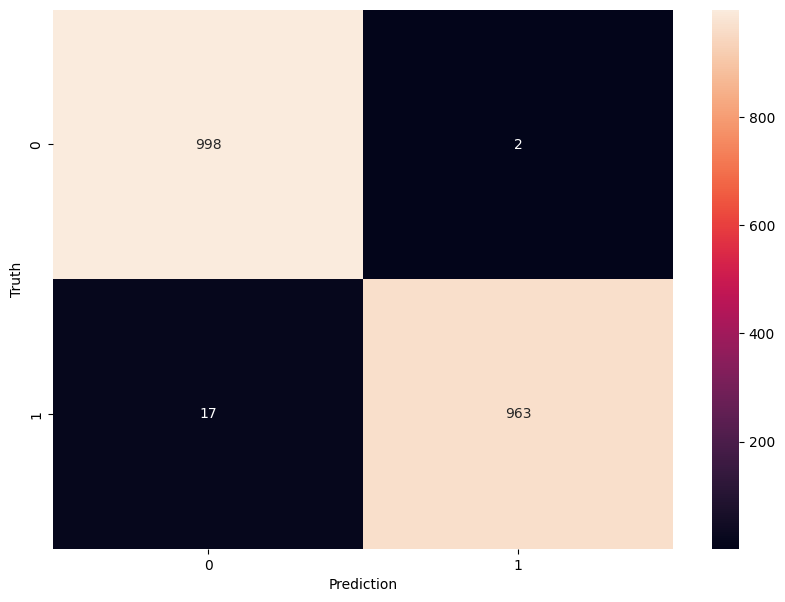

In [51]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')